# Rainfall Prediction
*Author: Kamau Wa Wainaina*

The problem I'm trying to solve is predicting if it will rain given past data. 

In [1]:
# Avoid unneccessary warnings
import warnings 
warnings.filterwarnings("ignore")

In [2]:
# Librabries I'll use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

In [3]:
# Data files used
path = "../../../Data/playground-series-s5e3/"
train = pd.read_csv(path+"train.csv")
test = pd.read_csv(path+"test.csv")
sample_submission = pd.read_csv(path+"sample_submission.csv")

Let's take a quick overview of the data we're working with.

In [4]:
train.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


In [5]:
test.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,2190,1,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,24.3
1,2191,2,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,35.3
2,2192,3,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,16.9
3,2193,4,1022.9,20.6,17.3,15.2,9.5,75.0,45.0,7.1,20.0,50.6
4,2194,5,1022.2,16.1,13.8,6.4,4.3,68.0,49.0,9.2,20.0,19.4


In [6]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2190.0,1094.500000,632.342866,0.0,547.250,1094.50,1641.750,2189.0
day,2190.0,179.948402,105.203592,1.0,89.000,178.50,270.000,365.0
pressure,2190.0,1013.602146,5.655366,999.0,1008.600,1013.00,1017.775,1034.6
maxtemp,2190.0,26.365799,5.654330,10.4,21.300,27.80,31.200,36.0
temparature,2190.0,23.953059,5.222410,7.4,19.300,25.50,28.400,31.5
mintemp,2190.0,22.170091,5.059120,4.0,17.700,23.85,26.400,29.8
dewpoint,2190.0,20.454566,5.288406,-0.3,16.800,22.15,25.000,26.7
humidity,2190.0,82.036530,7.800654,39.0,77.000,82.00,88.000,98.0
cloud,2190.0,75.721918,18.026498,2.0,69.000,83.00,88.000,100.0
sunshine,2190.0,3.744429,3.626327,0.0,0.400,2.40,6.800,12.1


In [7]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
id,730.0,2554.500000,210.877136,2190.0,2372.250,2554.50,2736.750,2919.0
day,730.0,183.000000,105.438271,1.0,92.000,183.00,274.000,365.0
pressure,730.0,1013.503014,5.505871,1000.0,1008.725,1012.70,1017.600,1032.2
maxtemp,730.0,26.372466,5.672521,7.4,21.600,27.80,31.000,35.8
temparature,730.0,23.963288,5.278098,5.9,19.825,25.65,28.375,31.8
mintemp,730.0,22.110274,5.170744,4.2,17.825,23.90,26.400,29.1
dewpoint,730.0,20.460137,5.391169,-0.0,16.800,22.30,25.000,26.7
humidity,730.0,82.669863,7.818714,39.0,77.250,82.00,89.000,98.0
cloud,730.0,76.360274,17.934121,0.0,69.000,83.00,88.000,100.0
sunshine,730.0,3.664384,3.639272,0.0,0.325,2.20,6.675,11.8


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.6 KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             730 non-null    int64  
 1   day            730 non-null    int64  
 2   pressure       730 non-null    float64
 3   maxtemp        730 non-null    float64
 4   temparature    730 non-null    float64
 5   mintemp        730 non-null    float64
 6   dewpoint       730 non-null    float64
 7   humidity       730 non-null    float64
 8   cloud          730 non-null    float64
 9   sunshine       730 non-null    float64
 10  winddirection  729 non-null    float64
 11  windspeed      730 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 68.6 KB


## Exploratory Data Analysis

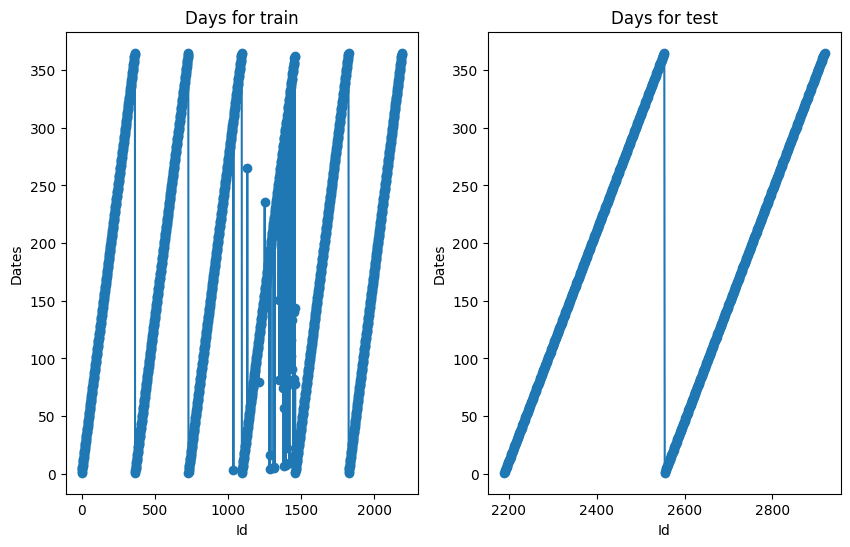

In [10]:
def plot_dates(train, test):
    fig, ax = plt.subplots(1, 2, figsize=(10, 6))
    ax[0].plot("id", "day", data=train, marker="o")
    ax[0].set_title("Days for train")
    ax[0].set_xlabel("Id")
    ax[0].set_ylabel("Dates")
    ax[1].plot("id", "day", data=test, marker="o")
    ax[1].set_title("Days for test")
    ax[1].set_xlabel("Id")
    ax[1].set_ylabel("Dates")
    plt.show()
plot_dates(train, test)

From the above we see that some days for train are wrongly mislabelled. We can quickly fix this by assuming that the number of days are 1 - 365 for the six years.

In [11]:
train["day"] = list(np.arange(1, 366))*6

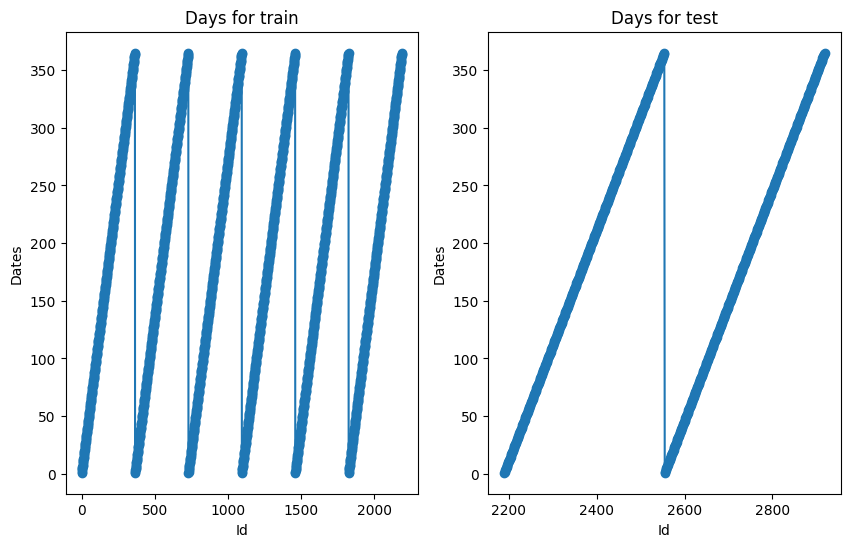

In [12]:
plot_dates(train, test)

Let's convert the day into year-month-day format to enable working with time series data.

In [13]:
train["year"] = [2018]*365 + [2019]*365 + [2020]*365 + [2021]*365 + [2022]*365 + [2023]*365
test["year"] = [2024]*365 + [2025]*365

In [14]:
train["date"] = pd.to_datetime(train["year"], format="%Y") + pd.to_timedelta(train["day"],"D") - pd.to_timedelta(1, "D")
test["date"] = pd.to_datetime(test["year"], format="%Y") + pd.to_timedelta(test["day"], "D") - pd.to_timedelta(1, "D")

In [15]:
train.drop(["id", "day", "year"], axis=1, inplace=True)
test.drop(["id", "day", "year"], axis=1, inplace=True)

Let's make date the index of both dataframes.

In [16]:
train = train.set_index("date")
test = test.set_index("date")

In [17]:
train.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
date,,,,,,,,,,,
2018-01-01,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
2018-01-02,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2018-01-03,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
2018-01-04,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
2018-01-05,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


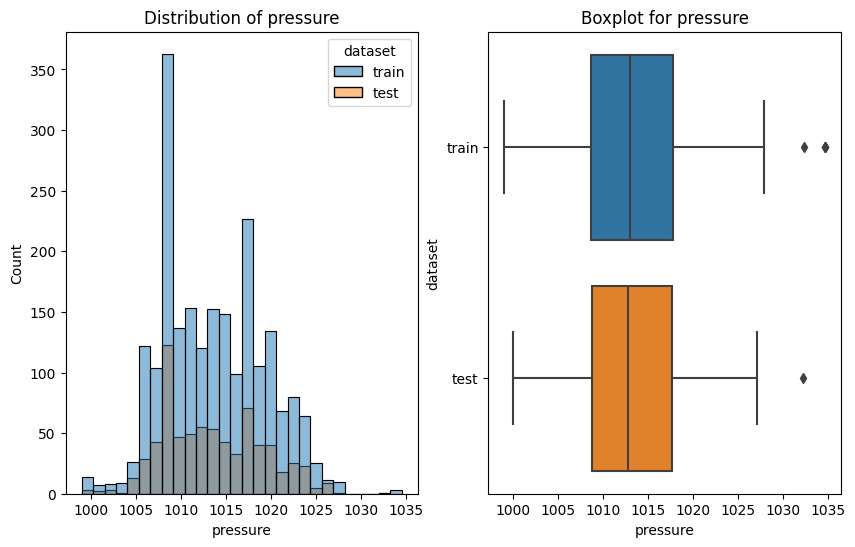

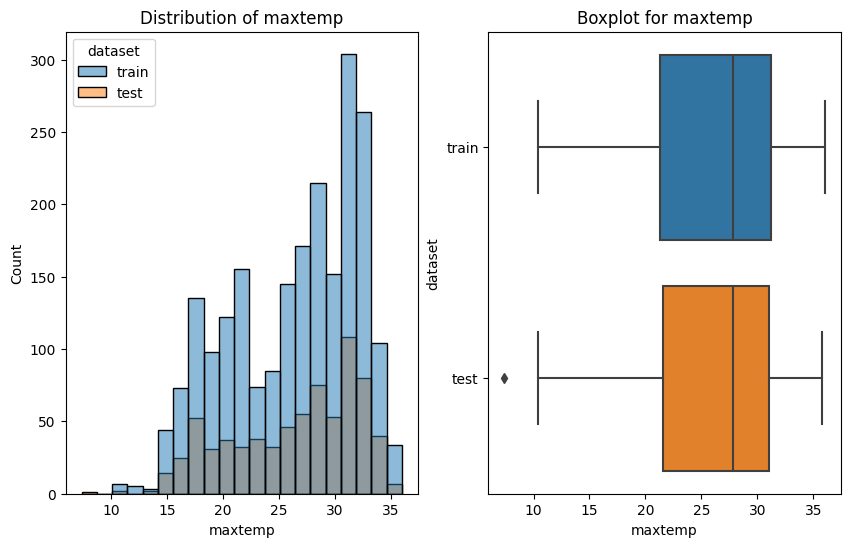

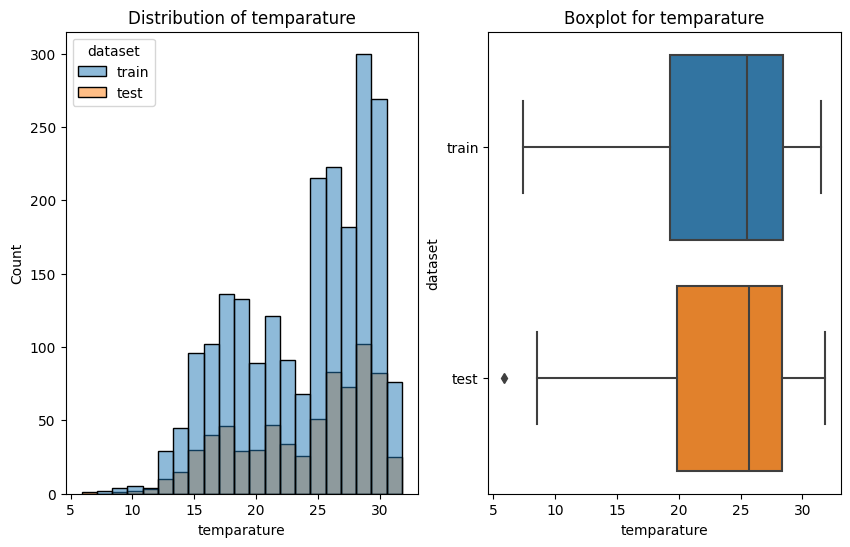

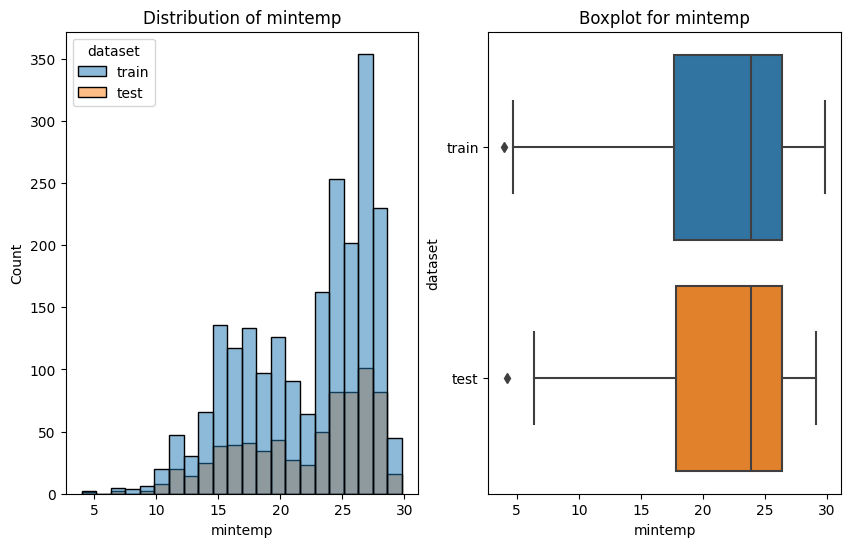

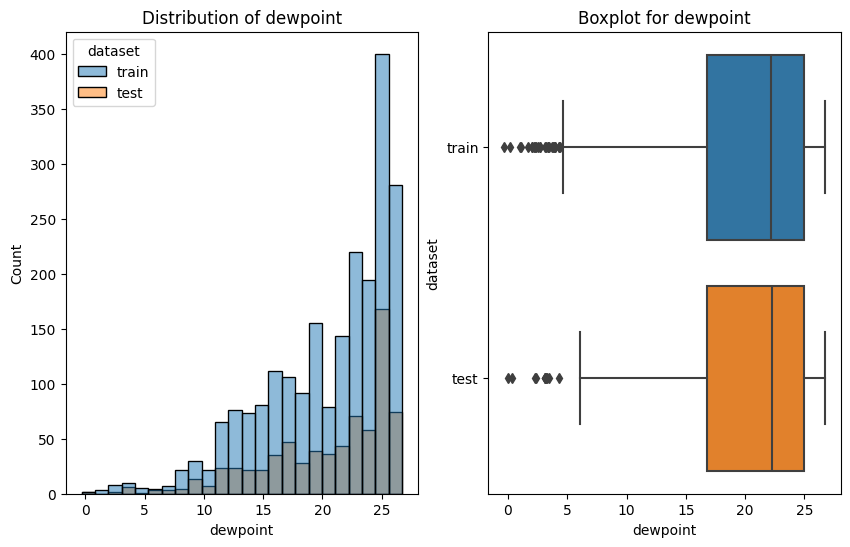

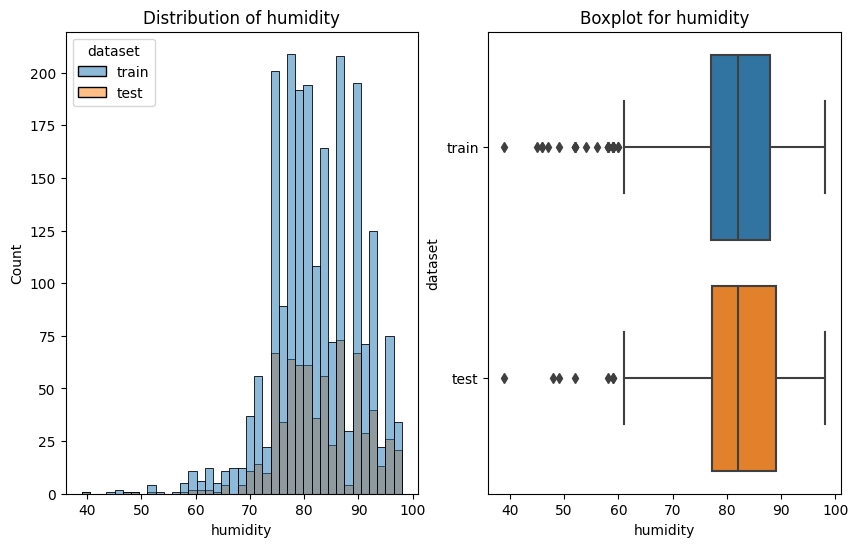

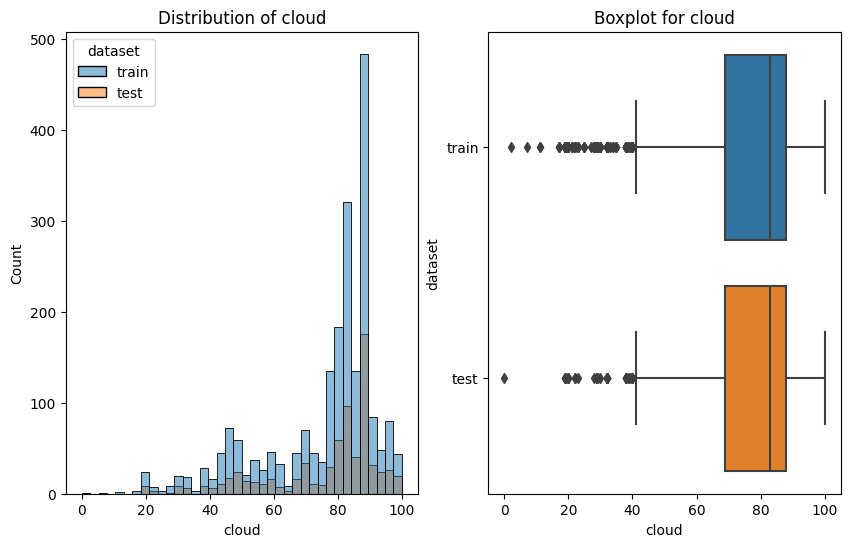

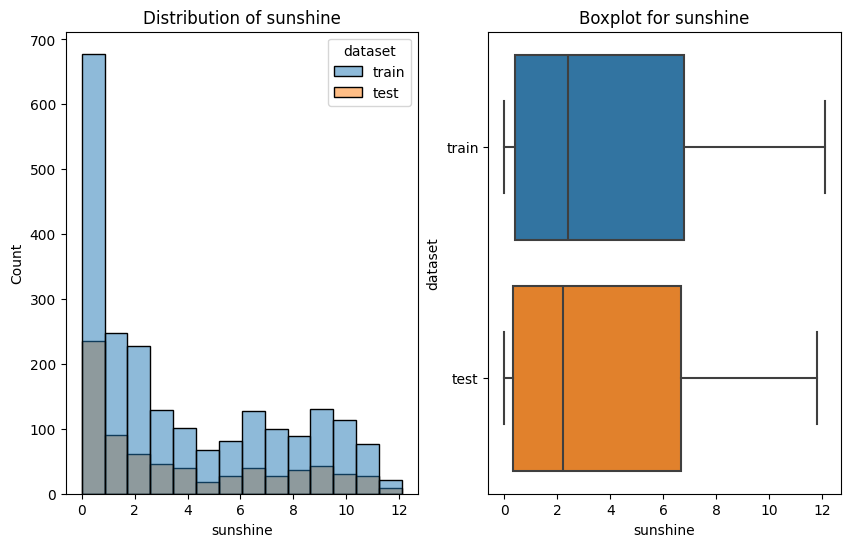

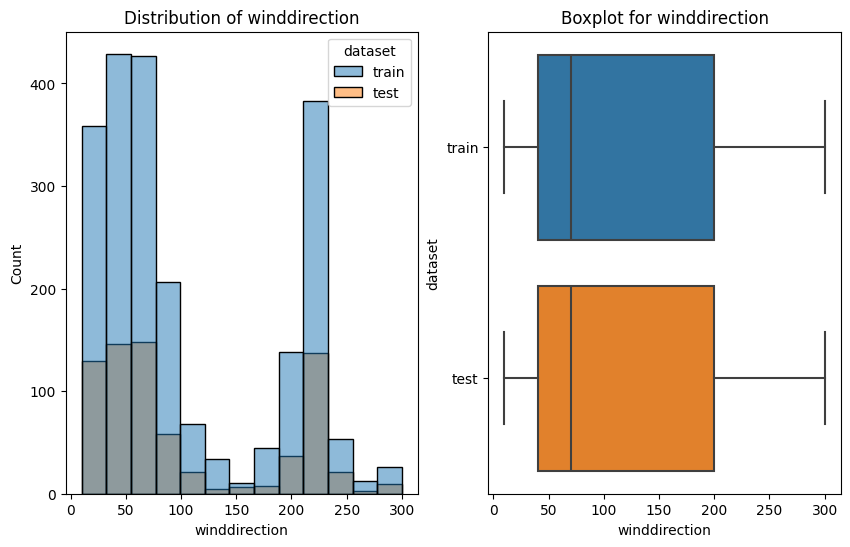

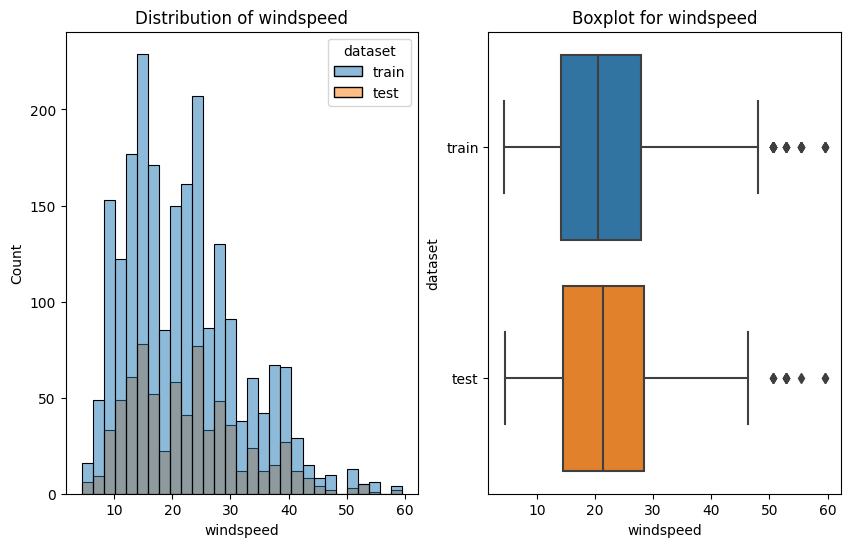

In [18]:
def hist_box_plot(data, cols):
    for i in range(10):
        fig, ax = plt.subplots(1, 2, figsize=(10, 6))
        sns.histplot(x=cols[i], hue="dataset", data=data, ax=ax[0])
        ax[0].set_title(f"Distribution of {cols[i]}")
        sns.boxplot(x=cols[i], y="dataset", data=data, ax=ax[1])
        ax[1].set_title(f"Boxplot for {cols[i]}")

train["dataset"] = "train"
test["dataset"] = "test"
combinded_df = pd.concat([train, test], axis=0)

hist_box_plot(combinded_df, test.columns)
        

In [19]:
combinded_df.tail()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall,dataset
date,,,,,,,,,,,,
2025-12-27,1020.8,18.2,17.6,16.1,13.7,96.0,95.0,0.0,20.0,34.3,NaN,test
2025-12-28,1011.7,23.2,18.1,16.0,16.0,78.0,80.0,1.6,40.0,25.2,NaN,test
2025-12-29,1022.7,21.0,18.5,17.0,15.5,92.0,96.0,0.0,50.0,21.9,NaN,test
2025-12-30,1014.4,21.0,20.0,19.7,19.8,94.0,93.0,0.0,50.0,39.5,NaN,test
2025-12-31,1020.9,22.2,18.8,17.0,13.3,79.0,89.0,0.2,60.0,50.6,NaN,test
